#Arboles de desición (load_iris) y Titanic

##1. Importamos librerias

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  #libreria para generar graficos

from sklearn.datasets import load_iris                  #dataset sobre la flor iris (uso libre)
from sklearn.model_selection import train_test_split    #clase para dividir dataset (train y test)
from sklearn.tree import DecisionTreeClassifier         #clase que permite implementar un arbol de desición
                       

##2. Cargar el datased

In [ ]:
db_iris = load_iris()

##3. Explorando los datos

In [ ]:
#imprimiento la descripcion del dataset
print(db_iris.DESCR)
#imprimiento datos del target
print(db_iris.target)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

##4. Convirtiendo el dataset en un dataframe

In [ ]:
df_iris = pd.DataFrame(db_iris.data, columns=db_iris.feature_names)
df_iris['target'] = db_iris.target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 5. Dividiendo el conjunto de datos (train y test)

In [ ]:
#dividiremos el dataset en  75% (train) y 25% (test), estos valores estan por defecto
X_train, X_test, Y_train, Y_test = train_test_split(df_iris[db_iris.feature_names], df_iris['target'], random_state=0)

##6. Instanciar un arbol de desición

In [ ]:
# vamos a usar un árbol de profundidad 2 (maximo dos niveles), 
#sino se define esta valor el arbol puede crecer hasta que el algoritmo encuentre una minima ramificación
#cual es la profundidad ideal?
arbol_clasi = DecisionTreeClassifier(max_depth = 3, random_state = 0)

##7. Entrenando el algoritmo

In [ ]:
arbol_clasi.fit(X_train, Y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

##8. Usar datos de test (25%) para predecir

In [ ]:
# Predición para un registro
#tomamos la información del primer registro (X_test)
print(X_test.iloc[0])
# el verdadero resultado de la flor
print(Y_test.iloc[0])
#le pasamos esos datos al algoritmo
arbol_clasi.predict(X_test.iloc[0].values.reshape(1, -1))

#Predicciones para varios (10) registros
arbol_clasi.predict(X_test[0:10])

sepal length (cm)    5.8
sepal width (cm)     2.8
petal length (cm)    5.1
petal width (cm)     2.4
Name: 114, dtype: float64
2


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1])

##9. calcular la precisión (accuary) del algoritmo

In [ ]:
accuary = arbol_clasi.score(X_test, Y_test)
print(accuary)

0.9736842105263158


##10. graficando el arbol

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#para graficar  Iris-Setosa (0), - Iris-Versicolour (1), - Iris-Virginica (2)
class_names_list=list(['setosa','versicolor','virginica'])
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(arbol_clasi,feature_names=db_iris.feature_names, class_names=class_names_list)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree_iris.png')

True

##11. conociendo las caracteristicas más importantes

In [ ]:
#creamos un dataframe de panda (mejora la visualización/administración de los datos)
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(arbol_clasi.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances.head(10)

,feature,importance
3,petal width (cm),0.578
2,petal length (cm),0.422
0,sepal length (cm),0.000
1,sepal width (cm),0.000


##12. Mejorando el árbol (que tanta profundidad es la óptima para el árbol?)


In [ ]:
#la profundad de un árbol la medimos con max_depth
# creamos una lista con profundidades de 1 a 6 
max_depth_lista = list(range(1, 6))
# creamos un listado de resultados de exactitud 
accuracy = []
for depth in max_depth_lista:
    
    arbol_clasi = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    arbol_clasi.fit(X_train, Y_train)
    score = arbol_clasi.score(X_test, Y_test)
    accuracy.append(score)


###12.1 creamos un grafico para ver los resultados

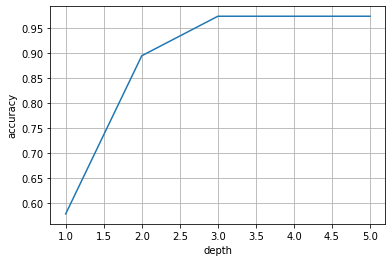

In [ ]:
plt.plot(max_depth_lista,accuracy)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.grid(True)
plt.show()

#Arbol de clasificación - dataset TITANIC.scv

##P1. Importar librerias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt                         #libreria para generar graficos
import seaborn as sns

from sklearn.model_selection import train_test_split    #clase para dividir dataset (train y test)
from sklearn.tree import DecisionTreeClassifier         #clase que permite implementar un arbol de desición
from sklearn.metrics import accuracy_score              #clase para generar la exactitud del modelo (accuracy)


##P2. cargando datos (leyendo csv)

In [ ]:
#podemos cargar el CSV directamente desde GITHUB con el raw
df = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Databasets/dataset_titanic.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##P3. Conociendo los datos

In [ ]:
#nombres de las columnas
df.columns
#descripción de información del df
df.describe()
# información del tipo de datos que tiene el df
df.info()
#valores nulos
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##P4. Imputación de datos

In [ ]:
def null_data (colums):
  age = colums[0]
  sex = colums[1]

  if pd.isnull(age):
    if sex == "male":
      return df[df['Sex']=="male"]['Age'].mean()
    elif sex == "female":
      return df[df['Sex']=="female"]['Age'].mean()
  else:
    return age


In [ ]:
df['Age'] = df[['Age', 'Sex']].apply(null_data, axis=1)

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##P4. Graficando los datos

0    0.616162
1    0.383838
Name: Survived, dtype: float64


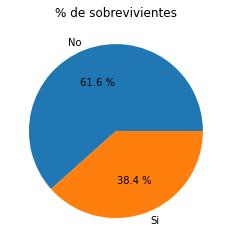

In [ ]:
#grafica de torta para sobrevivientes (si/no)
datos = df.Survived.value_counts(normalize=True)
print(datos)
plt.pie(datos, labels=["No","Si"],autopct="%0.1f %%")
plt.title("% de sobrevivientes")
plt.show()


female    0.681287
male      0.318713
Name: Sex, dtype: float64


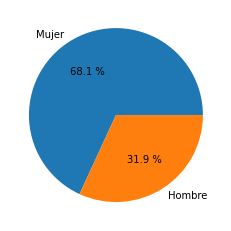

In [ ]:
#sobrevivientes vs sexo (Male / Female)
datos= df.Sex[df.Survived==1].value_counts(normalize=True)
print(datos)
plt.pie(datos,labels=["Mujer","Hombre"],autopct="%0.1f %%")
plt.show()

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64


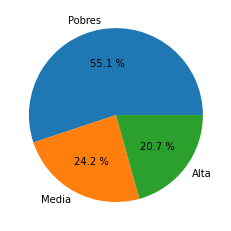

In [ ]:
#sobrevivientes por clase (3, 2,1)
#datos= df_titanic.Pclass[df_titanic.Survived==1].value_counts(normalize=True)
datos = df.Pclass.value_counts(normalize=True)
print(datos)
plt.pie(datos,labels=["Pobres","Media","Alta"],autopct="%0.1f %%")
plt.show()

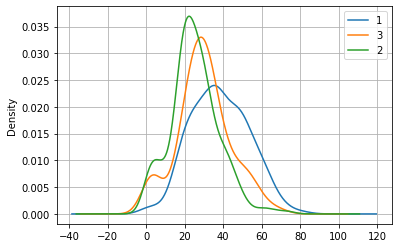

In [ ]:
# clases vs edad
for t_class in [1,2,3] :
  df.Age[df.Pclass==t_class].plot(kind="kde")
plt.legend({"1","2","3"})
plt.grid()
plt.show()


##P5. Eliminamos las columnas que no son relevantes para el estudio

In [ ]:
df.drop(['Cabin','PassengerId','Name','Ticket','Embarked '], axis=1,inplace=True)
df.dropna(inplace=True)
df.head()
#df.shape

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


##P6. Reemplazando palabras por numeros

In [ ]:
from sklearn import preprocessing    #clase que permite hacer ETL 
#cambiar palabbras en orden alfabetico por números Female (0), Male (1)
le =preprocessing.LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


##P7. reemplazando nulos con ceros

In [ ]:
df["Age"] = df["Age"].fillna(0)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


##P8. instanciar un árbol de decisión

In [ ]:
#arbol = DecisionTreeClassifier()
arbol = DecisionTreeClassifier(max_depth=5, random_state=0)

##P9. Separamos los datos 

In [ ]:
#X= (Pclass + Sex +Age +Sibsp + Parch + Fare)
#y= survived

X= df[["Pclass","Sex","Age","SibSp","Parch"]]
Y= df['Survived']
#train y test, random_state=number --> estraer siempre los mismo datos en el entrenamiento (capacitación)
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state=4)
arbol.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

##P10. entrenamos el modelo

In [ ]:
arbol.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

##P12. realizamos predicción

In [ ]:
y_train_predi=arbol.predict(X_train)
y_test_predi= arbol.predict(X_test)
#calcular la exactitud
print("Accuracy of train: %"+ str(accuracy_score(y_train_predi,Y_train)))
print("Accuracy of test: %"+ str(accuracy_score(y_test_predi, Y_test)))
#overfitting 
print("Accuracy Global %"+ str(arbol.score(X_test,Y_test)))

Accuracy of train: %0.8637274549098196
Accuracy of test: %0.8046511627906977
Accuracy Global %0.8046511627906977


##P13. Graficando el árbol

In [ ]:
#clases para graficar
classs_name_list= list(["dead","live"])
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
dot_data= export_graphviz(arbol, feature_names=["Pclass","Sex","Age","SibSp","Parch"],class_names=classs_name_list)
graphic= graph_from_dot_data(dot_data)
graphic.write_png("arbol_titanic_v3.png")

True

##P14. probar arbol con diferentes profundidades

In [ ]:
#lista_de_profundidades (1-6)
depth_list = list(range(1,6))
#vector de accuracy
accuracy_list=[]
for depth in depth_list:
  arbol = DecisionTreeClassifier(max_depth=depth,random_state=42)
  arbol.fit(X_train,Y_train)
  score= arbol.score(X_test,Y_test)
  accuracy_list.append(score)


##P15. Grafico de resultados

<function matplotlib.pyplot.show>

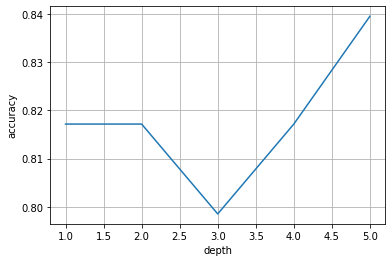

In [ ]:
plt.plot (depth_list, accuracy_list)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.grid(True)
plt.show
